In [4]:
# prevent unnecessary display of IPython warnings
import warnings
warnings.filterwarnings('ignore')

# import necessary libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

# initialize main DataFrame
hist_df = pd.DataFrame(columns=['Date'])

# use SimpleImputer for filling missing data by taking the mean of the previous and following data points
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# define stock/ETF ticker symbols for analysis
symbols = ['AAPL','AMZN','DIA','FB','MSFT','NFLX','SPY','TSLA','TWTR','XOM']

# Perform the following for every ticker symbol
for s in symbols:
    sym_df = pd.read_csv('../Data Wrangling/' + s + '.csv')  # Read in the source data as a DataFrame
    
    # Fit and fill missing data using SimpleImputer
    imp_mean.fit(sym_df[['Open', 'High', 'Low', 'Close', 'Adj Close']]) 
    imp_df = pd.DataFrame(imp_mean.transform(sym_df[['Open', 'High', 'Low', 'Close', 'Adj Close']]))
    
    # Rename imputed DataFrame
    imp_df.rename(columns={0:'Open',
                           1:'High',
                           2:'Low',
                           3:'Close',
                           4:'Adj Close'}, inplace=True)
    
     # Convert Date object column to Datetime data type
    imp_df['Date'] = pd.to_datetime(sym_df.Date)
    
    # Add Symbol column to clarify which data belongs to which symbol
    imp_df['Symbol'] = s
    
    # Append imputed DataFrame to main DataFrame
    hist_df = hist_df.append(imp_df,sort=False)

# Set index for main DataFrame as Date for Time Series plots
hist_df.set_index('Date',inplace=True)

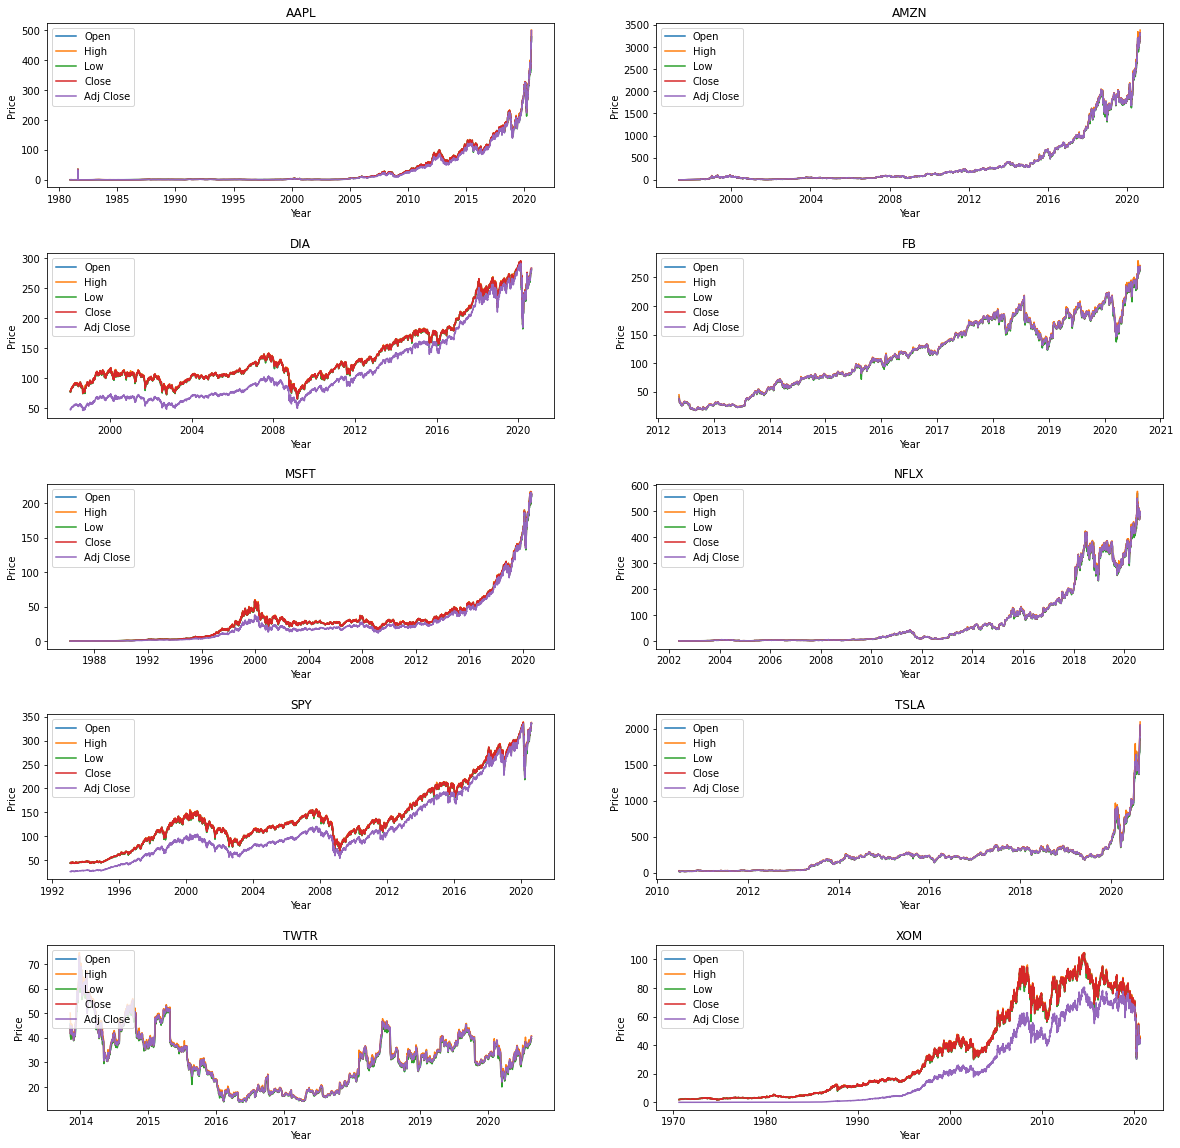

In [3]:
# Plot all pricing data (Open, High, Low, Close, Adjusted Close) for all ticker symbols
fig,i = plt.subplots(5,2,figsize=(20,20))
n = 0
for a in range(5):
    for b in range(2):
        s = symbols[n]
        for col in hist_df.columns[:5]:
            i[a][b].plot(hist_df[hist_df.Symbol==s].index,hist_df[hist_df.Symbol==s][col],label=col)
        i[a][b].legend(loc='best')
        i[a][b].set_xlabel('Year')
        i[a][b].set_ylabel('Price')
        i[a][b].set_title(s)
        n += 1
        
fig.subplots_adjust(hspace=0.4)
plt.show()

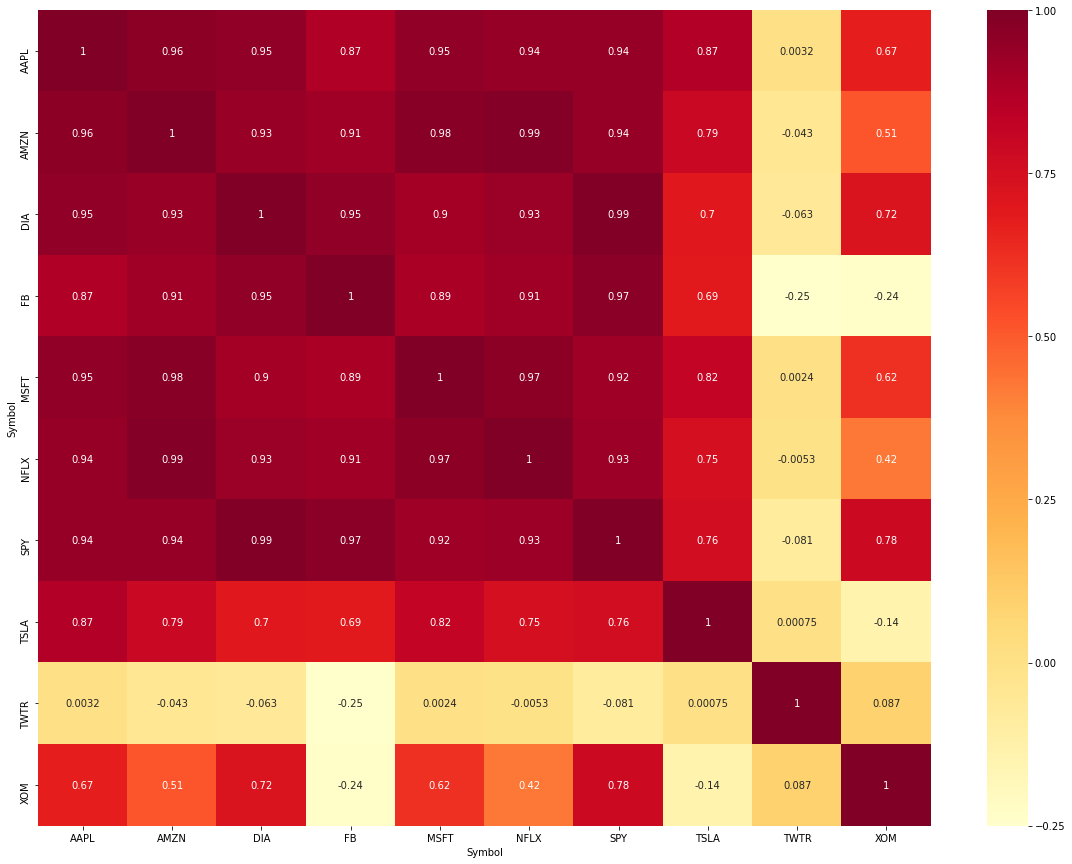

In [5]:
# Define pivot DataFrame for Adj Close prices only for following Correlation and Covariance analysis
adjClose_pivot = hist_df.pivot(columns = 'Symbol', values = 'Adj Close')

# Plot heatmap of Adj Close price correlation using the Pearson method for all ticker symbols
plt.figure(figsize=(20,15))
sns.heatmap(adjClose_pivot.corr(), annot=True, cmap = 'YlOrRd')
plt.show()

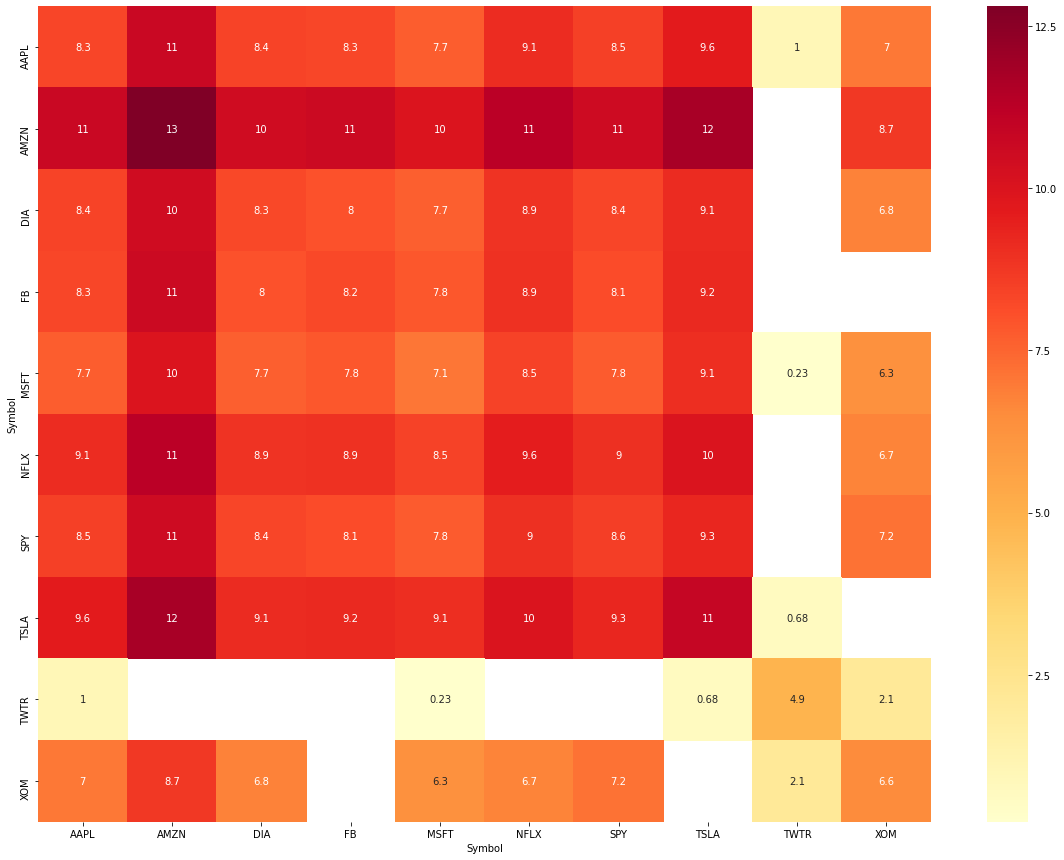

In [6]:
# Plot heatmap of Adj Close price covariance for all ticker symbols
plt.figure(figsize=(20,15))
sns.heatmap(np.log(adjClose_pivot.cov()), annot=True, cmap = 'YlOrRd')
plt.show()